In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import magpylib as magpy
from scipy.spatial.transform import Rotation as R
import scipy.constants as constants
from scipy import stats
from math import pi, sqrt, ceil, log 
from scipy.optimize import curve_fit
from scipy import constants
import jdc
import math

from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.special import kn

In [10]:
b_x=0.003 # m
b_y=0.003 # m
b_z=0.001 # m

$\textbf{F}_\textbf{B}=\nabla\int_V\textbf{M}\cdot\textbf{B}{dV}=\frac{\mu_0}{2}\int_V\nabla(\chi_x H_x^2+\chi_y H_y^2 + \chi_z H_z^2){dV}$

$    B^{(1)}_z(x,y,z)=-\frac{B_0}{2\pi}[F_1(-x,y,z)+F_1(-x,y,-z)\\
    +F_1(-x,-y,z)+F_1(-x,-y,-z)\\
    +F_1(x,y,z)+F_1(x,y,-z)\\
    +F_1(x,-y,z)+F_1(x,-y,-z)]$
    
$F_1(x,y,z)=\\
tan^{-1}\left[\frac{(x+\frac{b_x}{2})(y+\frac{b_y}{2})}{(z+\frac{b_z}{2})\sqrt{(x+\frac{b_x}{2})^2+(y+\frac{b_y}{2})^2+(z+\frac{b_z}{2})^2}}\right]$

In [11]:
def B_static_component(x,y,z):

    B_0 = 0.5 # T/m
    F_1 = math.atan((x+b_x/2)*(y+b_y/2)/((z+b_z/2)*sqrt((x+b_x/2)**2+(y+b_y/2)**2+(z+b_z/2)**2)))
    return -B_0*F_1/(2*pi)

In [12]:
def B_static(x,y,z):
    sum_B_static_component = B_static_component(-x,y,z) + B_static_component(-x,y,-z) + \
    + B_static_component(-x,-y,z) + B_static_component(-x,-y,-z) \
    + B_static_component(x,-y,z) + B_static_component(x,-y,-z) 
    return sum_B_static_component

In [13]:
x=5e-4 # m
y=5e-4 # m
z=1e-4 # m

print("{0:.8f}".format(B_static(x,y,z)))

-0.48396128


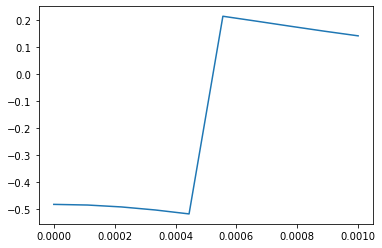

In [19]:
z=np.linspace(0, 0.001, 10)
B_static_vector = np.vectorize(B_static)
plt.plot(z, B_static_vector(x,y,z))